<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/dacon/movie/Movie20221129.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/movie/movies_test.csv
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/movie/movies_train.csv
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/movie/submission.csv

--2022-11-29 12:35:09--  https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/movie/movies_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26039 (25K) [text/plain]
Saving to: ‘movies_test.csv.2’

movies_test.csv.2   100%[===================>]  25.43K  --.-KB/s    in 0.002s  

2022-11-29 12:35:09 (12.0 MB/s) - ‘movies_test.csv.2’ saved [26039/26039]

--2022-11-29 12:35:09--  https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/movie/movies_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67137 

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#데이터살펴보기

In [76]:
train=pd.read_csv('movies_train.csv')
test=pd.read_csv('movies_test.csv')
smpl_sub=pd.read_csv('submission.csv')

In [77]:
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


In [78]:
train.info()
#dir_prev_bfnum 컬럼체크// 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [79]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [80]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


#데이터 모델링

In [81]:
distributor_list = train.distributor.value_counts()[:5]
distributor_list

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
Name: distributor, dtype: int64

In [82]:
#상위 5개의 배급사를 제외하고 '기타'로 처리
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [83]:
distributor_list = train.distributor.value_counts()[:6]

distributor_list

기타           409
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
(주)쇼박스        26
Name: distributor, dtype: int64

In [84]:
#결측치가 많은 데이터 제거
train=train.drop(['dir_prev_bfnum'],axis=1)
test=test.drop(['dir_prev_bfnum'],axis=1)

In [85]:
#제목 의미가 없기 때문에 제거
train=train.drop(['title'],axis=1)
test=test.drop(['title'],axis=1)

In [86]:
#감독명 너무 다양해서 제거
train=train.drop(['director'],axis=1)
test=test.drop(['director'],axis=1)

In [87]:
## 배급사를 숫자로 변명하는게 좋을까?
train.distributor.value_counts()

기타           409
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
(주)쇼박스        26
Name: distributor, dtype: int64

In [88]:
train.head()

,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,4,343,4,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,2,20,6,217866
4,기타,코미디,2010-11-04,108,15세 관람가,1,251,2,483387


In [89]:
#라벨인코딩

In [90]:
train['genre'] = train['genre'].map({'뮤지컬':0, '다큐멘터리':1, '서스펜스':2, '애니메이션':3,
                                    '멜로/로맨스':4, '미스터리':5, '공포':6, '드라마':7, '코미디':8,
                                    'SF':9, '액션':10, '느와르':11})
test['genre'] = test['genre'].map({'뮤지컬':0, '다큐멘터리':1, '서스펜스':2, '애니메이션':3,
                                    '멜로/로맨스':4, '미스터리':5, '공포':6, '드라마':7, '코미디':8,
                                    'SF':9, '액션':10, '느와르':11})

In [91]:
train['distributor']=train['distributor'].map({'CJ 엔터테인먼트':0, '롯데엔터테인먼트':1,'(주)NEW':2, '(주)마운틴픽쳐스':3,'(주)쇼박스':4,'기타':5 })
test['distributor']=test['distributor'].map({'CJ 엔터테인먼트':0, '롯데엔터테인먼트':1,'(주)NEW':2, '(주)마운틴픽쳐스':3,'(주)쇼박스':4,'기타':5 })

In [92]:
train['screening_rat']=train['screening_rat'].map({'전체 관람가':0, '12세 관람가':1, '15세 관람가':2, '청소년 관람불가':3 })
test['screening_rat']=test['screening_rat'].map({'전체 관람가':0, '12세 관람가':1, '15세 관람가':2, '청소년 관람불가':3 })

In [93]:
#release time String-->float
train['year']=train['release_time'].str.slice(0,4)
train['month']=train['release_time'].str.slice(5,7)
test['year']=test['release_time'].str.slice(0,4)
test['month']=test['release_time'].str.slice(5,7)
train=train.drop('release_time',axis=1)
test=test.drop('release_time', axis=1)

In [94]:
train.head()

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,1,10,96,3,0,91,2,23398,2012,11
1,4,11,130,3,2,387,3,7072501,2015,11
2,4,10,123,2,4,343,4,6959083,2013,06
3,2,8,101,0,2,20,6,217866,2012,07
4,5,8,108,2,1,251,2,483387,2010,11


In [95]:
test.head()

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,year,month
0,5,11,125,3,2,304,3,2010,01
1,4,4,113,1,4,275,3,2010,01
2,0,7,115,1,3,419,7,2010,01
3,4,10,116,2,2,408,2,2010,02
4,0,6,110,2,1,380,1,2010,02


In [96]:
train.describe()

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,3.913333,5.790000,100.863333,1.863333,0.876667,151.118333,3.706667,7.081818e+05
std,1.774186,2.801603,18.097528,1.051903,1.183409,165.654671,2.446889,1.828006e+06
min,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,3.000000,4.000000,89.000000,1.000000,0.000000,17.000000,2.000000,1.297250e+03
50%,5.000000,7.000000,100.000000,2.000000,0.000000,82.500000,3.000000,1.259100e+04
75%,5.000000,7.000000,114.000000,3.000000,2.000000,264.000000,4.000000,4.798868e+05
max,5.000000,11.000000,180.000000,3.000000,5.000000,869.000000,25.000000,1.426277e+07


In [97]:
#보기쉽게 -1과 1사이의 숫자로 정리
df_train=pd.DataFrame(train)
df_train.loc[:,'box_off_num']
df_train.corr().sort_values('box_off_num',ascending=False)
#스태프의 숫자, time이 중요하다 

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
box_off_num,-0.342961,0.279454,0.441452,0.018508,0.259674,0.544265,0.111179,1.000000
num_staff,-0.501063,0.466936,0.623205,0.127448,0.450706,1.000000,0.077871,0.544265
time,-0.317170,0.404035,1.000000,0.146784,0.306727,0.623205,0.114153,0.441452
genre,-0.202837,1.000000,0.404035,0.440037,0.236391,0.466936,0.058944,0.279454
dir_prev_num,-0.277035,0.236391,0.306727,0.068244,1.000000,0.450706,0.014006,0.259674
num_actor,-0.023555,0.058944,0.114153,-0.033762,0.014006,0.077871,1.000000,0.111179
screening_rat,-0.034088,0.440037,0.146784,1.000000,0.068244,0.127448,-0.033762,0.018508
distributor,1.000000,-0.202837,-0.317170,-0.034088,-0.277035,-0.501063,-0.023555,-0.342961


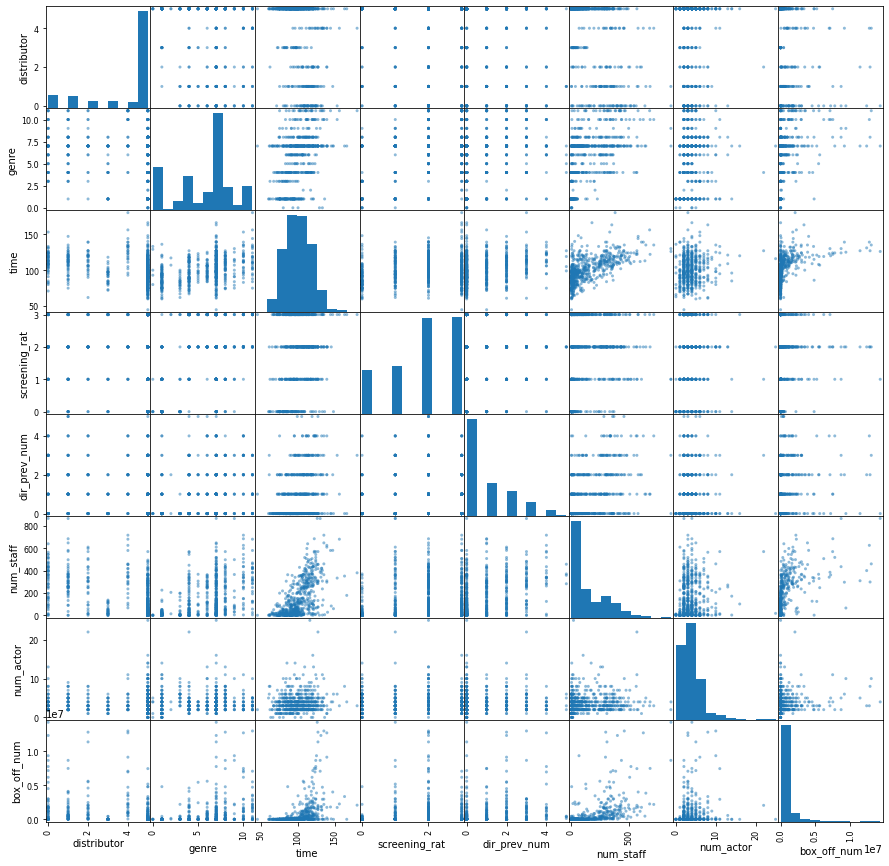

In [98]:
pd.plotting.scatter_matrix(train, figsize = (15,15))
plt.show()

In [99]:
#원핫 인코딩 --------------> 적용하면 컬럼수가 train,test가 달라짐
# train=pd.get_dummies(train)
# test=pd.get_dummies(test)

In [100]:
train_x=train.drop(['box_off_num'],axis=1)
train_y=train['box_off_num']


In [101]:
#evaluation을 위해서 train데이터를 train와 valid로 다시 쪼개기
x_train,x_valid,y_train,y_valid=train_test_split(train_x,train_y,test_size=0.2, shuffle=True,random_state=2)

In [102]:
#train 데이터와 valid 데이터 shape 확인
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((480, 9), (120, 9), (480,), (120,))

#학습

In [103]:
#make a model
from sklearn.ensemble import RandomForestRegressor
RandomForest=RandomForestRegressor(n_estimators=100)
RandomForest.fit(x_train,y_train)
y_pred=RandomForest.predict(x_valid)


In [104]:
#mae mse값이 너무 높음
#692560889888.3265
#346223.11213888886

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_valid,y_pred)
mae=mean_absolute_error(y_valid,y_pred)
print(mse)
print(mae)

873896394794.4281
482725.6055


## gridSearch를 이용한 random forest모델 학습

In [105]:
from sklearn.model_selection import GridSearchCV
random_forest_tuning = RandomForestRegressor()
param_grid = {
   'n_estimators': [10, 20, 40],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 40]})

In [106]:
GSCV.best_params_ 

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [107]:
pred=GSCV.predict(x_valid)

In [108]:
mse=mean_squared_error(y_valid,pred)
mae=mean_absolute_error(y_valid,pred)
print(mse)
print(mae)

# 829942118180.23 // 5,10,20
# 444744.38833333337
# 약간 줄음

#2차 조정 //10, 20, 40
#740995235712.31
#457211.7679559787

798695339389.776
461638.5464791961


## 원데이터에 적용

In [109]:
from sklearn.model_selection import GridSearchCV
random_forest_tuning = RandomForestRegressor()
param_grid = {
   'n_estimators': [10, 20, 40],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 40]})

In [110]:
pred=GSCV.predict(test)

In [111]:
smpl_sub

,title,box_off_num
0,용서는 없다,2.563505e+06
1,아빠가 여자를 좋아해,1.148278e+06
2,하모니,1.693859e+06
3,의형제,1.802735e+06
4,평행 이론,1.191267e+06
...,...,...
238,해에게서 소년에게,1.064991e+05
239,울보 권투부,7.008528e+04
240,어떤살인,2.266671e+05
241,말하지 못한 비밀,7.665726e+04


In [112]:
smpl_sub['box_off_num']=pred

In [113]:
smpl_sub

,title,box_off_num
0,용서는 없다,2.878918e+06
1,아빠가 여자를 좋아해,1.236369e+06
2,하모니,1.129802e+06
3,의형제,1.258821e+06
4,평행 이론,7.919681e+05
...,...,...
238,해에게서 소년에게,1.682812e+03
239,울보 권투부,2.836775e+03
240,어떤살인,3.585411e+05
241,말하지 못한 비밀,1.892062e+03


In [114]:
smpl_sub.to_csv('submission.csv', index=False)

In [115]:
# 원데이터로 적용해봄
RandomForest.fit(train_x, train_y)
y_pred=RandomForest.predict(test)

In [116]:
y_pred

array([3.48628797e+06, 1.36218424e+06, 1.51359360e+06, 1.83907128e+06,
       1.24988382e+06, 4.83333400e+04, 2.54973200e+04, 1.87046900e+04,
       5.40577700e+04, 4.56154930e+05, 4.48519660e+05, 1.56842713e+06,
       1.34905271e+06, 4.28771000e+03, 8.10384480e+05, 3.81390265e+06,
       4.19726900e+04, 2.26618465e+06, 5.69876460e+05, 1.32317636e+06,
       8.98045000e+03, 7.77127400e+04, 5.95759000e+05, 7.90568600e+04,
       7.72976400e+04, 9.33531020e+05, 1.91756000e+03, 1.50477629e+06,
       1.15200300e+05, 2.74964000e+05, 2.33523494e+06, 3.38345000e+04,
       2.19942650e+05, 1.72865918e+06, 1.56645780e+05, 8.20771370e+05,
       1.80175760e+05, 7.89084000e+03, 1.15989760e+05, 9.97432000e+03,
       5.69542470e+05, 4.46681100e+04, 7.16570690e+05, 1.27570211e+06,
       1.48040850e+06, 1.29960677e+06, 1.02097400e+04, 5.34793200e+04,
       2.05359047e+06, 1.48310310e+05, 2.09674630e+05, 5.56590560e+05,
       2.63044230e+05, 9.51550440e+05, 8.08468440e+05, 5.97879390e+05,
      

In [117]:
smpl_sub['box_off_num']=y_pred

In [118]:
smpl_sub

,title,box_off_num
0,용서는 없다,3486287.97
1,아빠가 여자를 좋아해,1362184.24
2,하모니,1513593.60
3,의형제,1839071.28
4,평행 이론,1249883.82
...,...,...
238,해에게서 소년에게,171606.94
239,울보 권투부,4084.20
240,어떤살인,339035.57
241,말하지 못한 비밀,6935.05


In [119]:
!pwd

/content


In [120]:
smpl_sub.to_csv('submission.csv', index=False)

# 제출

In [121]:
#1차제출 1382826.435041 555등 
#2차제출 1348420.285462 480등 gridsearch 적용


In [122]:
# catboost에 대해서 배웠음

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    int64 
 1   genre          600 non-null    int64 
 2   time           600 non-null    int64 
 3   screening_rat  600 non-null    int64 
 4   dir_prev_num   600 non-null    int64 
 5   num_staff      600 non-null    int64 
 6   num_actor      600 non-null    int64 
 7   box_off_num    600 non-null    int64 
 8   year           600 non-null    object
 9   month          600 non-null    object
dtypes: int64(8), object(2)
memory usage: 47.0+ KB


In [124]:
# 년도랑 월수를 숫자로 바꿔보기
# 데이터 모델링 다시 공부해보자


#---------------------------- 밑으로 무시

In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
#원데이터로 재학습
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [ ]:
train_x.shape,train_y.shape, test.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)


In [ ]:
y_pred=model.predict(test)

In [ ]:
y_pred

In [ ]:
smpl_sub

In [ ]:
smpl_sub['box_off_num']=y_pred

In [ ]:
smpl_sub['']

In [ ]:
# https://www.youtube.com/watch?v=_6s--yeOhr0

In [ ]:
test.shape

In [ ]:
#참고 https://blog.naver.com/vail131/222423545773
#참고 https://towardsdatascience.com/random-forest-regression-5f605132d19d